This notebook is for looking at the data produced by `test_full_simulation.cpp`.  This test produces files in the `${project_root}/temp/` directory; however, the test is normally configured to clean up these files.  If you would like to rerun the notebook and examine the data produced by the test, then look near the bottom of `test_full_simulation.cpp` for the lines

```cpp
    // Clean up
    fs::remove_all(test_dir);
```

and comment out this line, then recompile the `integration_tests` target and run the tests.

In [75]:
import pandas as pd
from mpl_toolkits import mplot3d
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
thermoynamic_data = pd.read_csv("../../temp/test_full_simulation/thermodynamics.csv")
observation_data = pd.read_csv("../../temp/test_full_simulation/observations.csv")
snapshot_data = pd.read_csv("../../temp/test_full_simulation/snapshots.csv",
    header=[0,1])

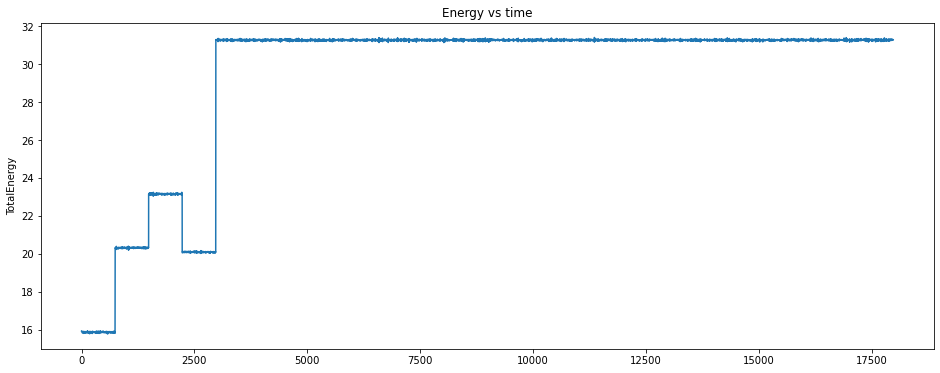

In [77]:
plt.figure(figsize=(16,6))
plt.title("Energy vs time")
sns.lineplot(data=thermoynamic_data['TotalEnergy'])
plt.show()

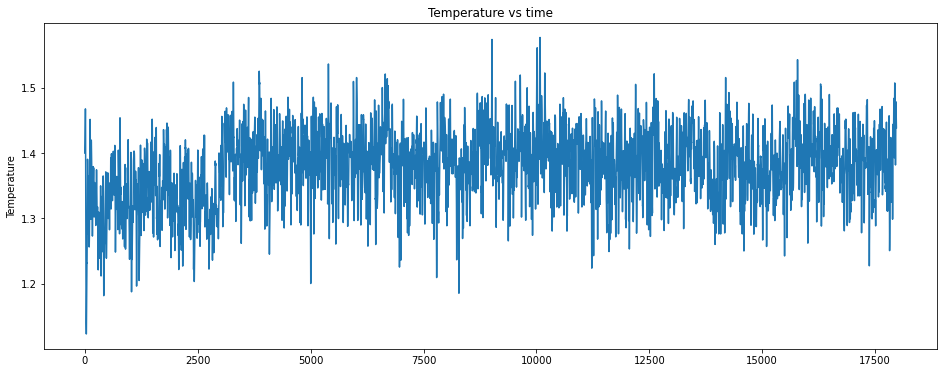

In [78]:
plt.figure(figsize=(16,6))
plt.title("Temperature vs time")
sns.lineplot(data=thermoynamic_data['Temperature'])
plt.show()

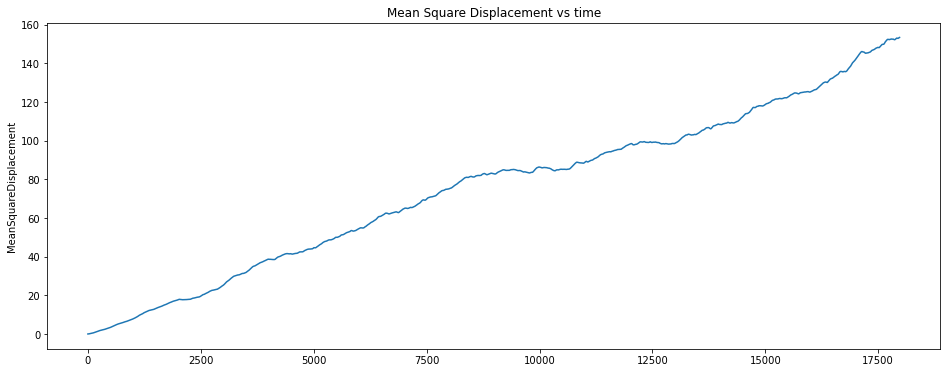

In [79]:
plt.figure(figsize=(16,6))
plt.title("Mean Square Displacement vs time")
sns.lineplot(data=thermoynamic_data['MeanSquareDisplacement'])
plt.show()

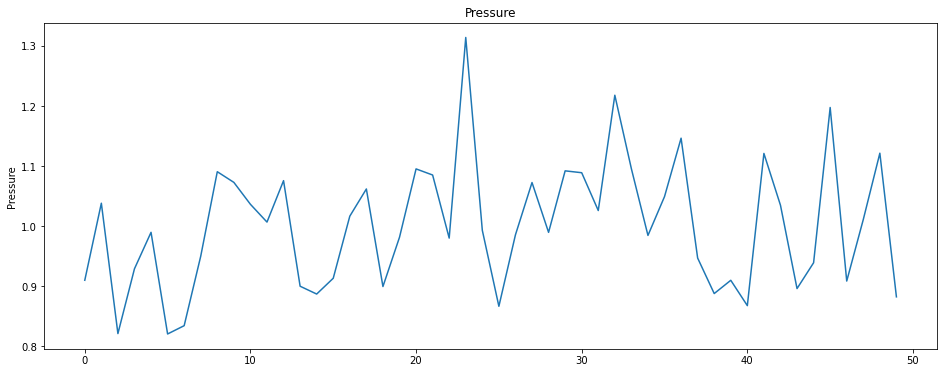

In [80]:
plt.figure(figsize=(16,6))
plt.title("Pressure")
sns.lineplot(data=observation_data['Pressure'])
plt.show()

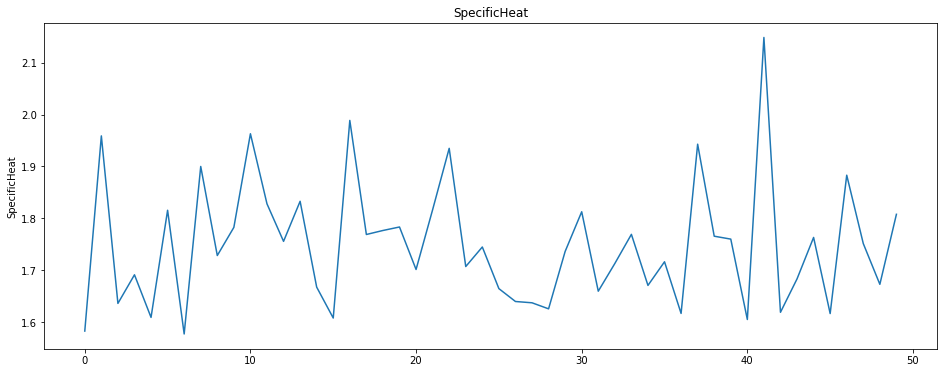

In [81]:
plt.figure(figsize=(16,6))
plt.title("SpecificHeat")
sns.lineplot(data=observation_data['SpecificHeat'])
plt.show()

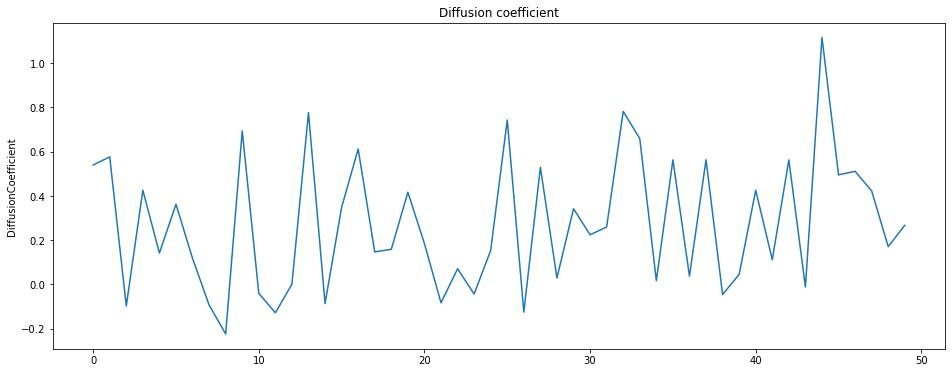

In [82]:
plt.figure(figsize=(16,6))
plt.title("Diffusion coefficient")
sns.lineplot(data=observation_data['DiffusionCoefficient'])
plt.show()

In [83]:
snapshot_data

TimeStep ParticleID  Position                      Velocity            \
   TimeStep ParticleID         X         Y         Z         X         Y   
0     17972          0  0.007231  2.708962  2.646474  2.506939  0.490157   
1     17972          1  2.747959  4.414649  1.003502  0.910594 -0.803021   
2     17972          2  0.669007  1.424272  1.757795 -0.078470  0.104601   
3     17972          3  0.872586  2.497391  5.791149 -0.065303 -1.232305   
4     17972          4  4.407653  3.488489  1.578252 -2.116821 -1.703102   
..      ...        ...       ...       ...       ...       ...       ...   
95    17972         95  1.301271  5.496502  3.678288  0.855901 -2.458702   
96    17972         96  4.494184  0.215042  3.276551 -0.256316  1.957082   
97    17972         97  1.135070  2.026688  2.838393 -0.610099 -2.836108   
98    17972         98  1.372959  3.274180  1.903956  0.893579 -0.430469   
99    17972         99  5.816297  0.722812  1.557656 -0.355879  0.783968   

                  Force                        
           Z          X          Y          Z  
0  -0.276059  -0.367572  -0.642366  -0.789249  
1   1.473762  -1.499337  -0.806500  -0.222293  
2  -1.267261   5.802859  30.140284  10.967634  
3   0.228287   4.079413   0.157068  -0.166530  
4   0.260769   2.497829   2.533232   3.900192  
..       ...        ...        ...        ...  
95 -1.890751   2.290838  10.732500   0.039922  
96 -0.749675  -0.734519   0.628897   1.493452  
97 -2.194851 -15.714787  -9.740874 -14.320187  
98  0.266362   4.763548  23.098183  26.534063  
99 -0.593642 -11.471369 -16.899150  -3.904421  

[100 rows x 11 columns]

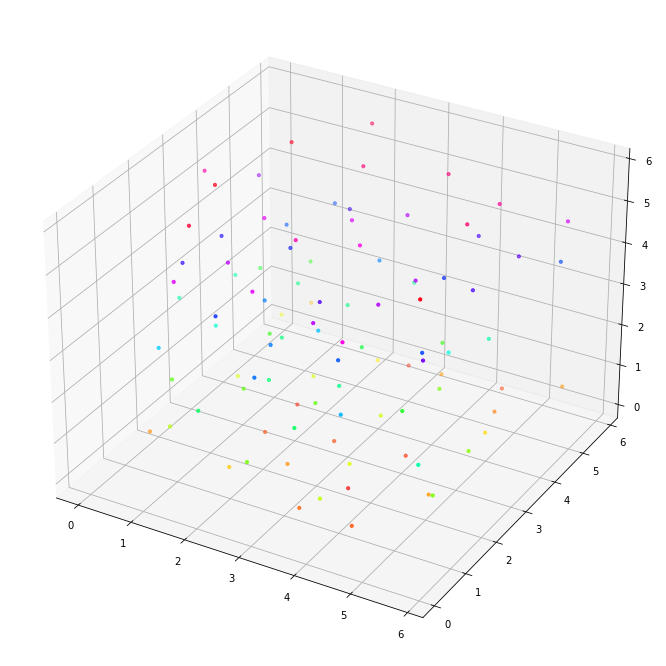

In [84]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(
    snapshot_data[('Position', 'X')],
    snapshot_data[('Position', 'Y')],
    snapshot_data[('Position', 'Z')],
    c=snapshot_data[('Position', 'Z')],
    cmap='hsv',
    s=10
)

plt.show()